In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
start_date = '2011-01-01'
end_date = '2023-08-31'

In [3]:
aapl=yf.download('AAPL',start=start_date, end=end_date)[['Close']]

[*********************100%***********************]  1 of 1 completed


In [4]:
aaplTrain=aapl['2011':'2023-06'];
aaplTest=aapl['2023-07':]

In [5]:
training_set = aaplTrain.iloc[:,[0]].values

In [6]:
training_set.shape

(3144, 1)

In [7]:
training_set

array([[ 11.77035713],
       [ 11.83178616],
       [ 11.92857075],
       ...,
       [189.25      ],
       [189.58999634],
       [193.97000122]])

### Visualizing non-normalized data

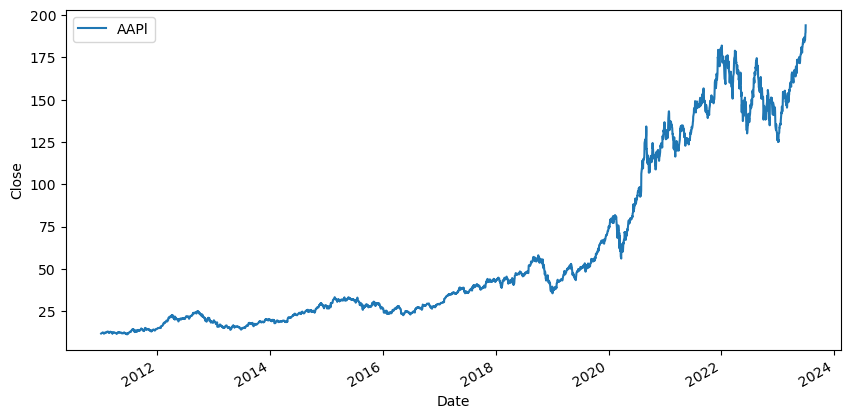

In [8]:
plt.figure(figsize=(10,5))
aaplTrain.Close.plot(label='AAPl');
plt.ylabel('Close')
plt.legend()

In [9]:
#scaling the datset- normalization
from sklearn.preprocessing import MinMaxScaler;
msc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=msc.fit_transform(training_set);

### Visualizing normalized data

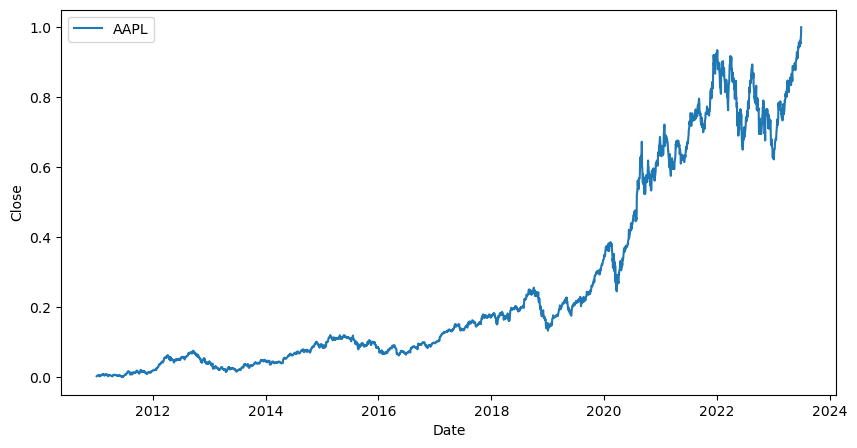

In [10]:
plt.figure(figsize=(10,5))
plt.xlabel('Date');
plt.ylabel('Close');
plt.plot(aaplTrain.index,training_set_scaled,label='AAPL');
plt.legend()

### Creating a data structure with 120 timesteps and 1 output

In [11]:
X_train=[];
y_train=[];
for i in range(120,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-120:i,0]);
    y_train.append(training_set_scaled[i,0]);
X_train,y_train=np.array(X_train), np.array(y_train)

In [12]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],-1)

In [13]:
print(X_train.shape)

(3024, 120, 1)


### Building GRU

In [14]:
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import TimeDistributed
from keras.layers import Dropout
from keras import Model

In [15]:
input=Input(shape=(X_train.shape[1],1))

lstmfirstlayer=LSTM(units=50, return_sequences=True)(input)
d=Dropout(0.2)(lstmfirstlayer)
lstmsecondlayer=LSTM(units=50, return_sequences=True)(d);
d=Dropout(0.2)(lstmsecondlayer)
lstmthirdlayer=LSTM(units=50, return_sequences=True)(d);
d=Dropout(0.2)(lstmthirdlayer)
lstmfourthlayer=LSTM(units=50, return_sequences=True)(d);
d=Dropout(0.2)(lstmfourthlayer);

grufirstlayer=GRU(units=50, return_sequences=True)(d)
d=Dropout(0.2)(grufirstlayer)
grusecondlayer=GRU(units=50, return_sequences=True)(d);
d=Dropout(0.2)(grusecondlayer)
gruthirdlayer=GRU(units=50, return_sequences=True)(d);
d=Dropout(0.2)(gruthirdlayer)
grufourthlayer=GRU(units=50, return_sequences=False)(d);
d=Dropout(0.2)(grufourthlayer);

finallayer=Dense(units=1)(d);
hybridmodel=Model(input,finallayer)

In [16]:
hybridmodel.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [17]:
hybridmodel.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
95/95 [==============================] - 132s 631ms/step - loss: 0.0132
Epoch 2/100
95/95 [==============================] - 51s 540ms/step - loss: 0.0038
Epoch 3/100
95/95 [==============================] - 52s 545ms/step - loss: 0.0029
Epoch 4/100
95/95 [==============================] - 54s 565ms/step - loss: 0.0029
Epoch 5/100
95/95 [==============================] - 65s 685ms/step - loss: 0.0026
Epoch 6/100
95/95 [==============================] - 63s 668ms/step - loss: 0.0027
Epoch 7/100
95/95 [==============================] - 63s 664ms/step - loss: 0.0026
Epoch 8/100
95/95 [==============================] - 62s 651ms/step - loss: 0.0025
Epoch 9/100
95/95 [==============================] - 62s 657ms/step - loss: 0.0026
Epoch 10/100
95/95 [==============================] - 64s 669ms/step - loss: 0.0023
Epoch 11/100
95/95 [==============================] - 63s 664ms/step - loss: 0.0025
Epoch 12/100
95/95 [==============================] - 57s 596ms/step - loss: 0.0020


95/95 [==============================] - 27s 282ms/step - loss: 8.3020e-04
Epoch 97/100
95/95 [==============================] - 27s 282ms/step - loss: 7.6637e-04
Epoch 98/100
95/95 [==============================] - 27s 281ms/step - loss: 8.0033e-04
Epoch 99/100
95/95 [==============================] - 27s 281ms/step - loss: 8.3182e-04
Epoch 100/100
95/95 [==============================] - 27s 288ms/step - loss: 8.4728e-04


In [18]:
hybridmodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 1)]          0         
                                                                 
 lstm (LSTM)                 (None, 120, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 120, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 120, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 120, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 120, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 120, 50)           0     

### Testing our model

In [19]:
dataset_test = aaplTest
real_stock_price = dataset_test.iloc[:, [0]].values

In [20]:
real_stock_price

array([[192.46000671],
       [191.33000183],
       [191.80999756],
       [190.67999268],
       [188.61000061],
       [188.08000183],
       [189.77000427],
       [190.53999329],
       [190.69000244],
       [193.99000549],
       [193.72999573],
       [195.1000061 ],
       [193.13000488],
       [191.94000244],
       [192.75      ],
       [193.61999512],
       [194.5       ],
       [193.22000122],
       [195.83000183],
       [196.44999695],
       [195.61000061],
       [192.58000183],
       [191.16999817],
       [181.99000549],
       [178.8500061 ],
       [179.80000305],
       [178.19000244],
       [177.97000122],
       [177.78999329],
       [179.46000671],
       [177.44999695],
       [176.57000732],
       [174.        ],
       [174.49000549],
       [175.83999634],
       [177.22999573],
       [181.11999512],
       [176.38000488],
       [178.61000061],
       [180.19000244],
       [184.11999512]])

### Visualizing AAPL test data before normalization

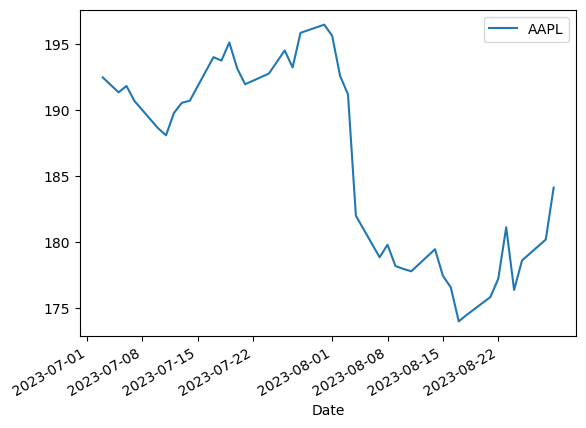

In [21]:
dataset_test.Close.plot(label='AAPL')
plt.legend(loc='best')

### Dataset Preparation

In [22]:
dataset_total=pd.concat((aaplTrain.Close,dataset_test.Close),axis=0)

In [23]:
inputs=dataset_total.iloc[len(dataset_total)-len(dataset_test)-120:].values

In [24]:
inputs=inputs.reshape(-1,1)

In [25]:
inputs = msc.transform(inputs)

In [26]:
X_test = []
for i in range(120, len(inputs)):
    X_test.append(inputs[i-120:i, 0])

In [27]:
X_test=np.array(X_test)

In [28]:
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],-1);

In [29]:
X_test.shape

(41, 120, 1)

In [30]:
y_pred=hybridmodel.predict(X_test)

2/2 [==============================] - 2s 31ms/step


In [31]:
y_pred_inverse_scaled=msc.inverse_transform(y_pred)

In [32]:
y_pred_inverse_scaled
predicted=list(y_pred_inverse_scaled.flat)

### Visualizing the real vs prediction data

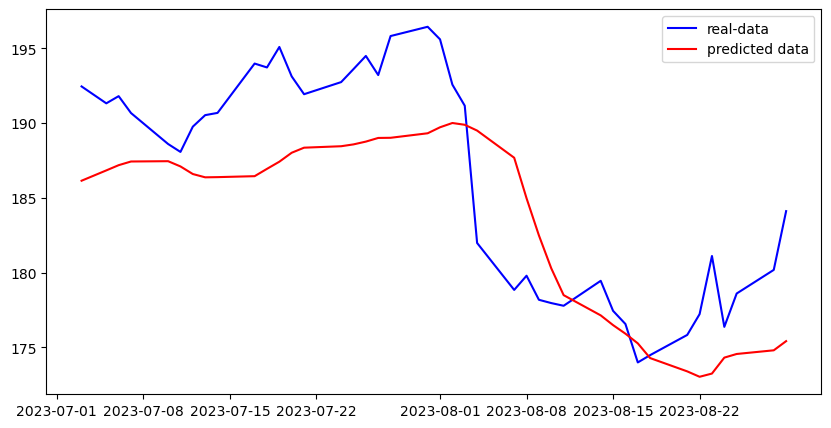

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(aaplTest.index,aaplTest.Close,label='real-data',color='blue');
plt.plot(aaplTest.index,predicted,label='predicted data', color='red');
plt.legend(loc='best')

### Evaluating the LSTM-GRU Hybrid model- RMSE and relative error

In [34]:
import math
def rmse(true_values, predicted_values):
    if len(true_values) != len(predicted_values):
        raise ValueError("The lengths of true_values and predicted_values must be the same.")
    squared_errors = [(true - pred) ** 2 for true, pred in zip(true_values, predicted_values)]
    mean_squared_error = sum(squared_errors) / len(true_values)
    rmse_value = math.sqrt(mean_squared_error)
    return rmse_value

rmse=rmse(real_stock_price,predicted)
relative_error= rmse/(max(real_stock_price)-min(real_stock_price))

In [35]:
print('RMSE: ',round(rmse,3));
print('Percentage of error is: ',round((relative_error[0]*100),3),'%');

RMSE:  4.887
Percentage of error is:  21.768 %
